In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import skimage.io as io
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import gaussian
import skimage.color as sColor
import skimage.transform as trs


In [2]:
cards = io.imread_collection('cards\*.jpg')


In [3]:
blurredImg = []
ratios = []
for img in tqdm(cards):
    temp = trs.resize(img[30:(img.shape[0]-70),30:(img.shape[1]-30)],(512,512))
    blurredImg.append(gaussian(sColor.rgb2grey(temp),sigma=10))
    ratios.append((512/img.shape[0],512/img.shape[1]))
    

100%|████████████████████████████████████████| 248/248 [00:15<00:00, 16.09it/s]


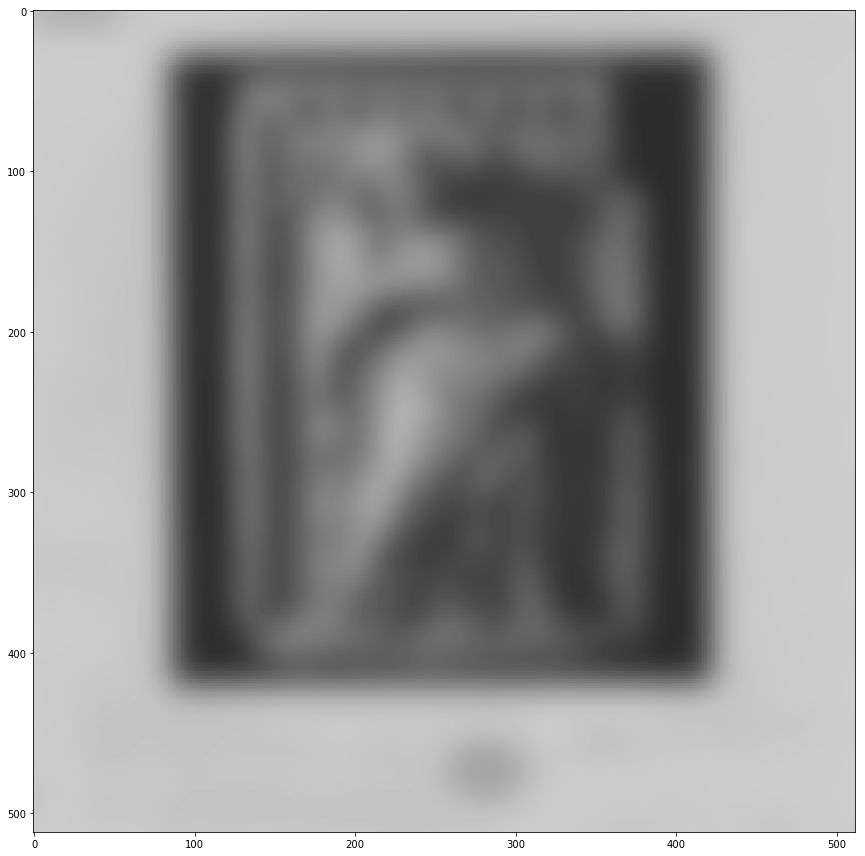

In [4]:
fig = plt.figure(figsize = (12,12))
io.imshow(blurredImg[5])

C:\Users\Robin\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
C:\Users\Robin\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


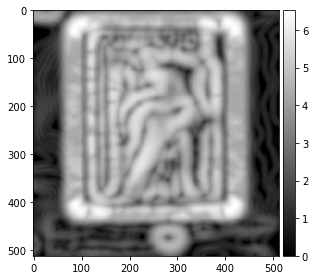

In [5]:

ent = entropy(blurredImg[5],disk(10))
io.imshow(ent,cmap="gray")

In [6]:
entropies = []
for img in tqdm(blurredImg):
    if np.max(img) >1:
        img = img/np.max(img)
    entropies.append(entropy(img,disk(10)))

  0%|                                                  | 0/248 [00:00<?, ?it/s]C:\Users\Robin\Anaconda3\lib\site-packages\skimage\util\dtype.py:110: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))
100%|████████████████████████████████████████| 248/248 [01:17<00:00,  3.18it/s]


In [7]:
integral = []
for img in entropies:
    integral.append(trs.integral_image(img))

In [8]:
Icropped = []
for img in cards:
    Icropped.append(trs.resize(img,(512,512)))

In [18]:
bestTop = (0,0)
bestBottom = (0,0)
maxEntPP = 0
area = 0
tempArea = 0
tempMax =0
a=0
myImg = integral[2]

for j in tqdm(range(312)):
    for i in range(312):
        #We compute the top left pixel integral value
        topIntegral =myImg[i,j]
        for y in range(j+200,512,2):
            #We precompute part of the area
            a = y-j+1.0
            for x in range(i+200,512,2):
                #We compute the window area, and its per pixel integral value
                tempArea =(x-i+1)*a
                tempMax =(myImg[x,y]-topIntegral)/tempArea
                
                #If this per pixel value is superior than the last max value AND the area is more than the last max area
                # we make this window as our best window so far
                if(tempMax> maxEntPP and tempArea > area): 
                    bestTop =(i,j)
                    bestBottom=(x,y)
                    maxEntPP= tempMax/tempArea
                    area = tempArea
                    

100%|████████████████████████████████████████| 312/312 [07:35<00:00,  1.46s/it]


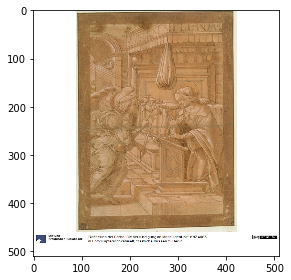

In [15]:
io.imshow(Icropped[2][bestTop[0]:bestBottom[0],bestTop[1]:bestBottom[1]])

In [19]:
g = myImg[511,511]/float(512*512)
g

2.8154522060214222

In [27]:
h= (myImg[420,460]-myImg[90,0] )/float(460*310)
h

3.9543108118375998

261121